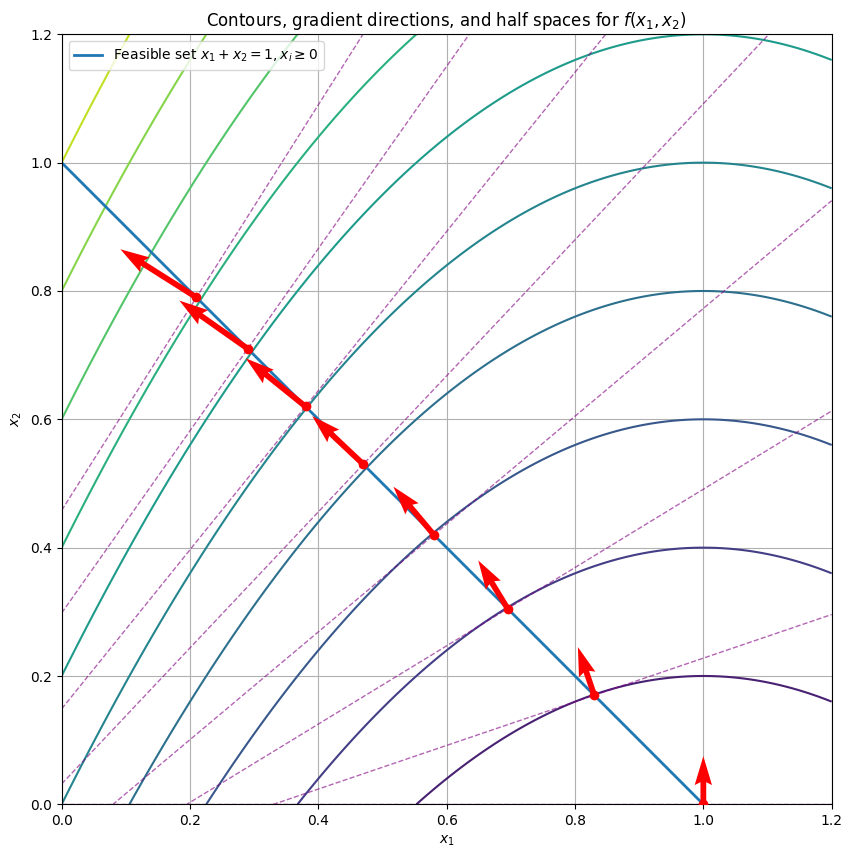

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Define objective function
def f(x1, x2):
    return (x1 - 1.0) ** 2 + x2

# Generate grid for contour plot
x1_vals = np.linspace(0.0, 1.2, 400)
x2_vals = np.linspace(0.0, 1.2, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
F = f(X1, X2)

# Create the plot
plt.figure(figsize=(10, 10))

# Contours of the objective function
contours = plt.contour(X1, X2, F, levels=10)

# Feasible set: line segment x1 + x2 = 1 with x1, x2 >= 0
t = np.linspace(0.0, 1.0, 200)
x_feas = 1.0 - t
y_feas = t
plt.plot(x_feas, y_feas, linewidth=2, label="Feasible set $x_1 + x_2 = 1, x_i \\geq 0$")

# Sample points approaching the optimal point (1, 0)
t_samples = np.array([0.79, 0.71, 0.62, 0.53, 0.42, 0.305, 0.17, 0])
x_samples = 1.0 - t_samples
y_samples = t_samples
plt.scatter(x_samples, y_samples, zorder=5, color="red", alpha=1)

# Plot gradient vectors at sample points (scaled for visibility)
grad_scale = 0.075
for x1, x2 in zip(x_samples, y_samples):
    grad = np.array([2.0 * (x1 - 1.0), 1.0])
    plt.quiver(x1, x2, grad_scale * grad[0], grad_scale * grad[1],
               angles="xy", scale_units="xy", scale=1, color="red" , alpha=1,
               zorder=10)
    
    # Plot line with normal vector defined by the gradient
    # Calculate the constant term for the line equation: grad[0]*x + grad[1]*y = c
    c = grad[0] * x1 + grad[1] * x2
    
    # Define x-coordinates for the line, spanning the plot width
    x_coords_line = np.array(plt.gca().get_xlim()) # Use current x-limits
    
    # Calculate corresponding y-coordinates for the line
    # grad[0]*x_coords_line + grad[1]*y_coords_line = c
    # y_coords_line = (c - grad[0]*x_coords_line) / grad[1]
    # (Assuming grad[1] is not zero, which is 1.0 in this case)
    y_coords_line = (c - grad[0] * x_coords_line) / grad[1]
    
    plt.plot(x_coords_line, y_coords_line, linestyle="--", color="purple", alpha=0.6, linewidth=1)


# Plot settings
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Contours, gradient directions, and half spaces for $f(x_1, x_2)$")
plt.xlim(0, 1.2)
plt.ylim(0, 1.2)
plt.gca().set_aspect("equal", adjustable="box")
plt.legend()
plt.grid(True)

plt.show()